### 결정트리
    - 프로그램 설치 : pip install graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=11, test_size=0.2
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, 'data/tree.dot', feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

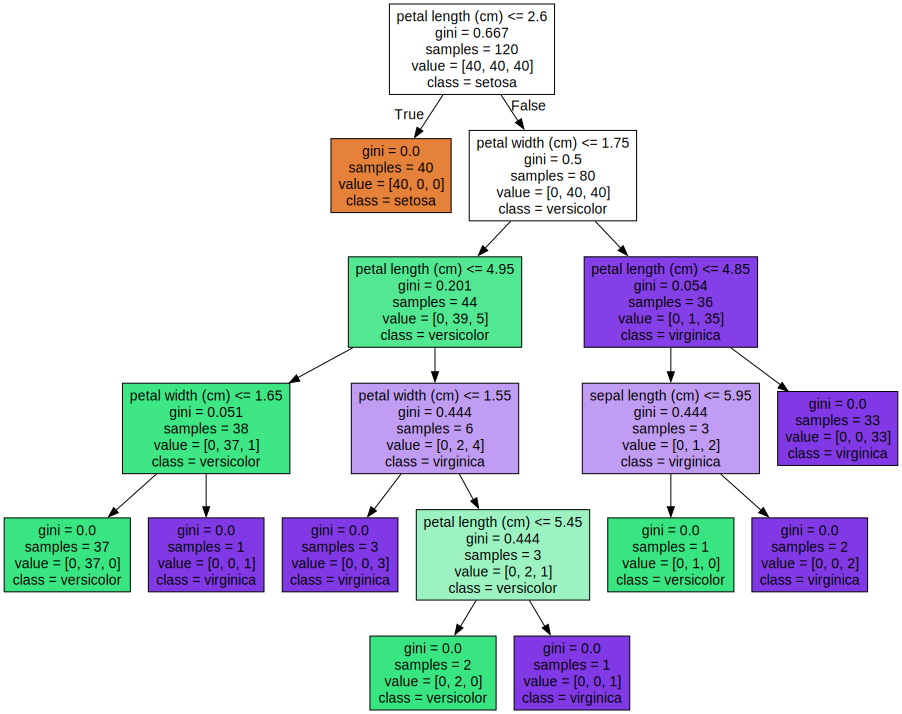

In [5]:
import graphviz as gpv
with open('data/tree.dot') as f:
    dot_graph = f.read()
gpv.Source(dot_graph)

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

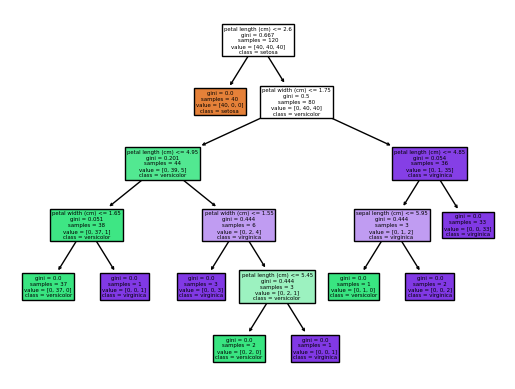

In [7]:
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

- 제약조건 (max_depth:3)

In [8]:
dtc2 = DecisionTreeClassifier(
    max_depth=3, random_state=156
)
dtc2.fit(X_train, y_train)
export_graphviz(dtc2, 'data/tree2.dot', feature_names=iris.feature_names, filled=True, class_names=iris.target_names)

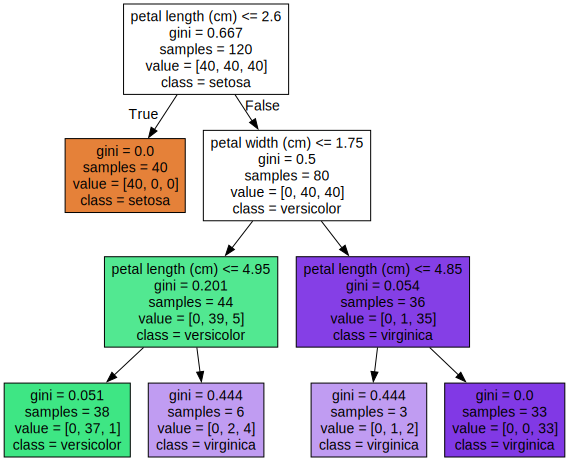

In [9]:
with open('data/tree2.dot') as f:
    dot_graph2 = f.read()
gpv.Source(dot_graph2)

- 제약조건 (min_samples_split:4)

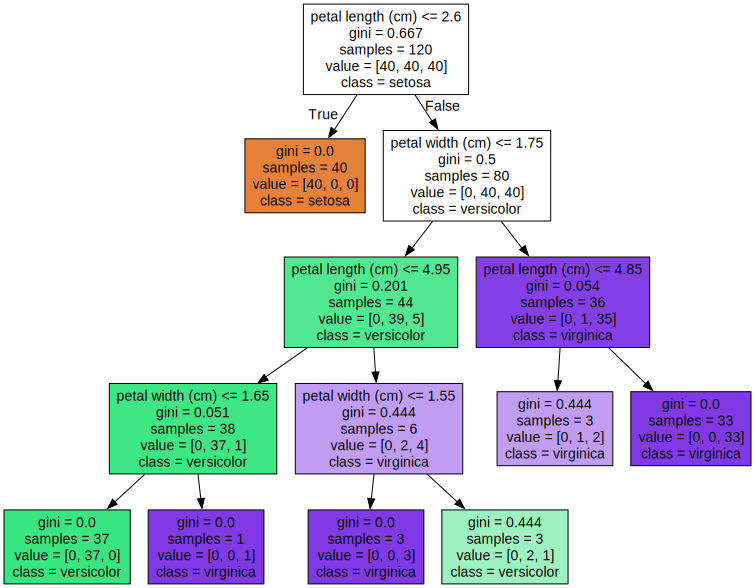

In [10]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(dtc3, 'data/tree3.dot', feature_names=iris.feature_names, filled=True, class_names=iris.target_names)
with open('data/tree3.dot') as f:
    dot_graph3 = f.read()
gpv.Source(dot_graph3)

- 모델 비교

In [12]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test)

(1.0, 1.0, 1.0)

- 모델이 제공하는 정보: feature_importances_

In [13]:
# method 뒤에 _있으면 학습후 모델이 제공하는 정보
dtc.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

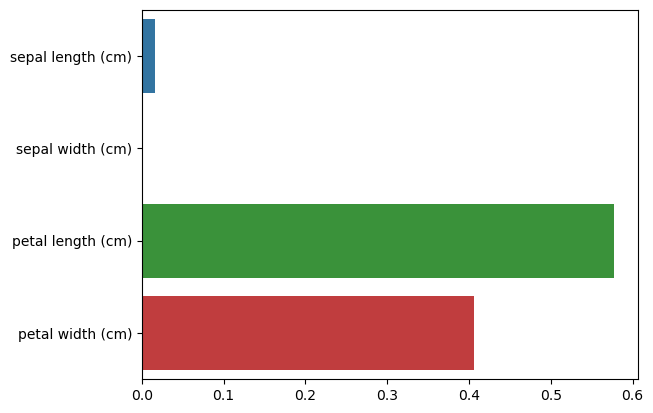

In [14]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names);

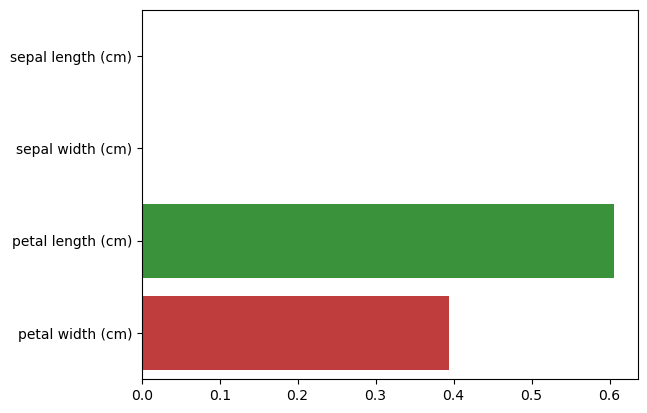

In [15]:
sns.barplot(x=dtc2.feature_importances_, y=iris.feature_names);

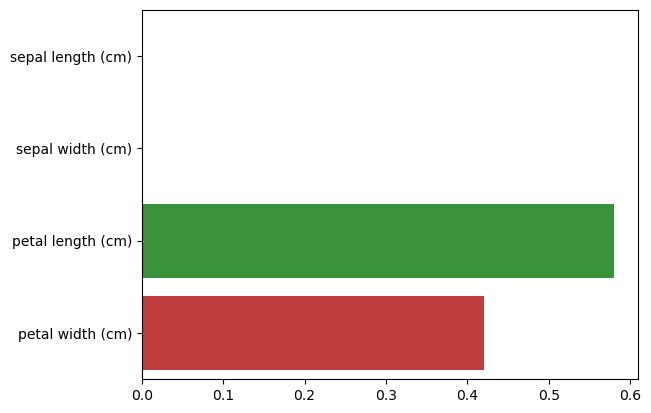

In [16]:
sns.barplot(x=dtc3.feature_importances_, y=iris.feature_names);